# Lesson 6: Fun with Raster Images 

## Sections:

1. [Command Line Basics](#step_1)
2. [Using Osgeo in Python](#step_2)
3. [Clipping a Raster Image to Fit a Shapefile Boarder](#step_3)


- [Suggested Readings](#readings)
- [References](#references)

# <a id='step_1'></a>

In [31]:
from IPython.display import Image
import shapefile as sf
from osgeo import gdal, gdalnumeric, ogr, osr
import numpy as np
import pandas as pd

## Step 1: Command Line Basics:

There are many tools out there to dig into different formats of data, but it would appear the post universally accepted way for GIS raster type data is to use the Open Source Geospatial foundation's <a href="http://www.osgeo.org/">(Osgeo)</a> package of GDAL and ORG. 

To intailly see some data about a raster file, you can use GDAL's command line tools:

```

gdalinfo AERONET_Fort_McMurray.2016136.terra.1km.tif

```

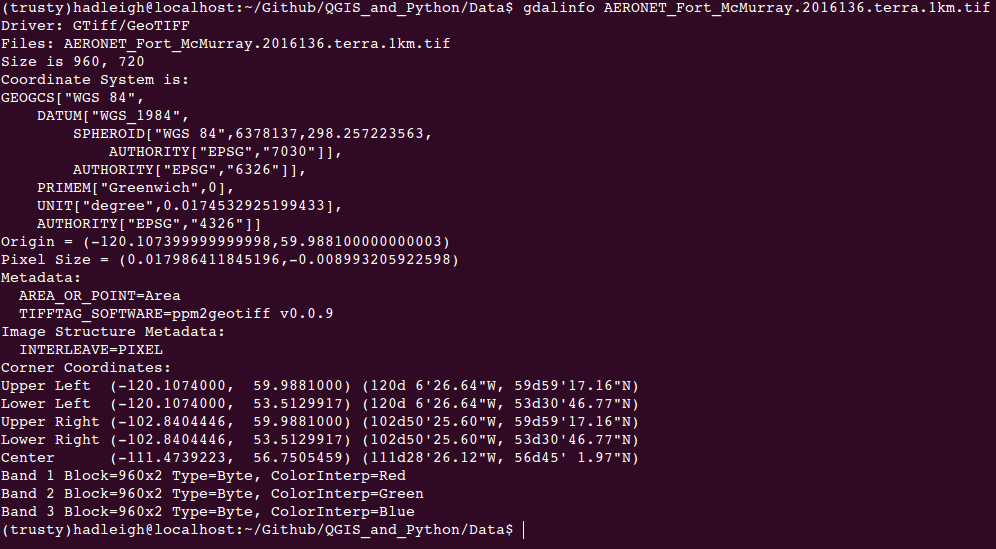

In [25]:
Image(filename="Images/lesson6_1.png", width=600, height=600)

The same thing can be done for shapefiles using ogrinfo:
    
```

ogrinfo Data/Alberta/Alberta.shp


```

```

ogrinfo -so Data/Alberta/Alberta.shp alberta


```

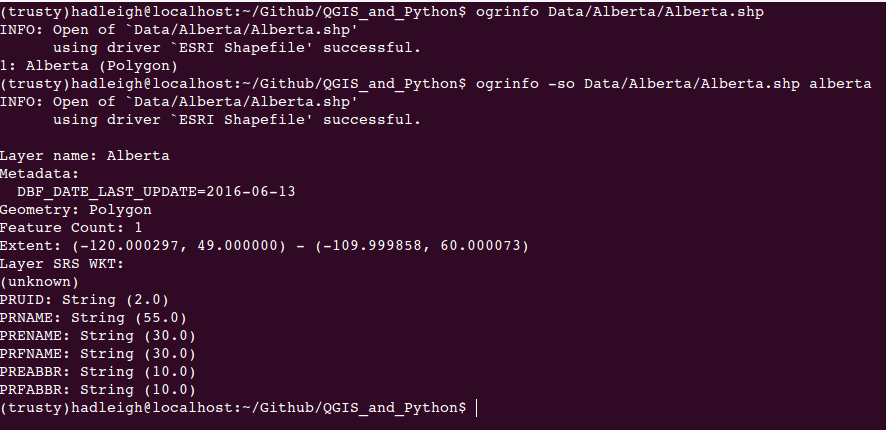

In [26]:
Image(filename="Images/lesson6_2.png", width=600, height=600)

# <a id='step_2'></a>

## Step 2: Clipping a Raster to a Shapefile Boundary:

This useful step has multiple ways to be completed. Joel Lawhead has a fully python scripted method that has been copied many times and improved along the way (just google 'clip raster to shapefile' to see many versions of his code), yet these can become rather tedious and complex scripts, which have pitfalls such as depreciated script langauge and modules. 

Using a gdal utility such as ```gdal_warp``` allows us to clip images easily, and then get on and use them. We can use the ```gdal_warp``` command line tools to make clipping a raster image a command line "one-liner":

```
gdalwarp \                                                # utility to be used

-cutline Data/Alberta/Alberta.shp \                       # specifying the outline of the border

-crop_to_cutline \                                        # function

-dstnodata "0.0" \                                        # the value of the pixels outside of the cutline

Data/AREONET_Fort_McMurray.2016136.terra.1km.tif \        # source file

Data/clipped_aeronet_raster.tif                           # output file

```
    
**Note:** This sets all pixels outside of the shapefile boarder to a value of 0.0, so we aren't really croppng the image, and QGIS will still see the entire raster file, yet it may be easier to visually interpret features when looking at your screen.

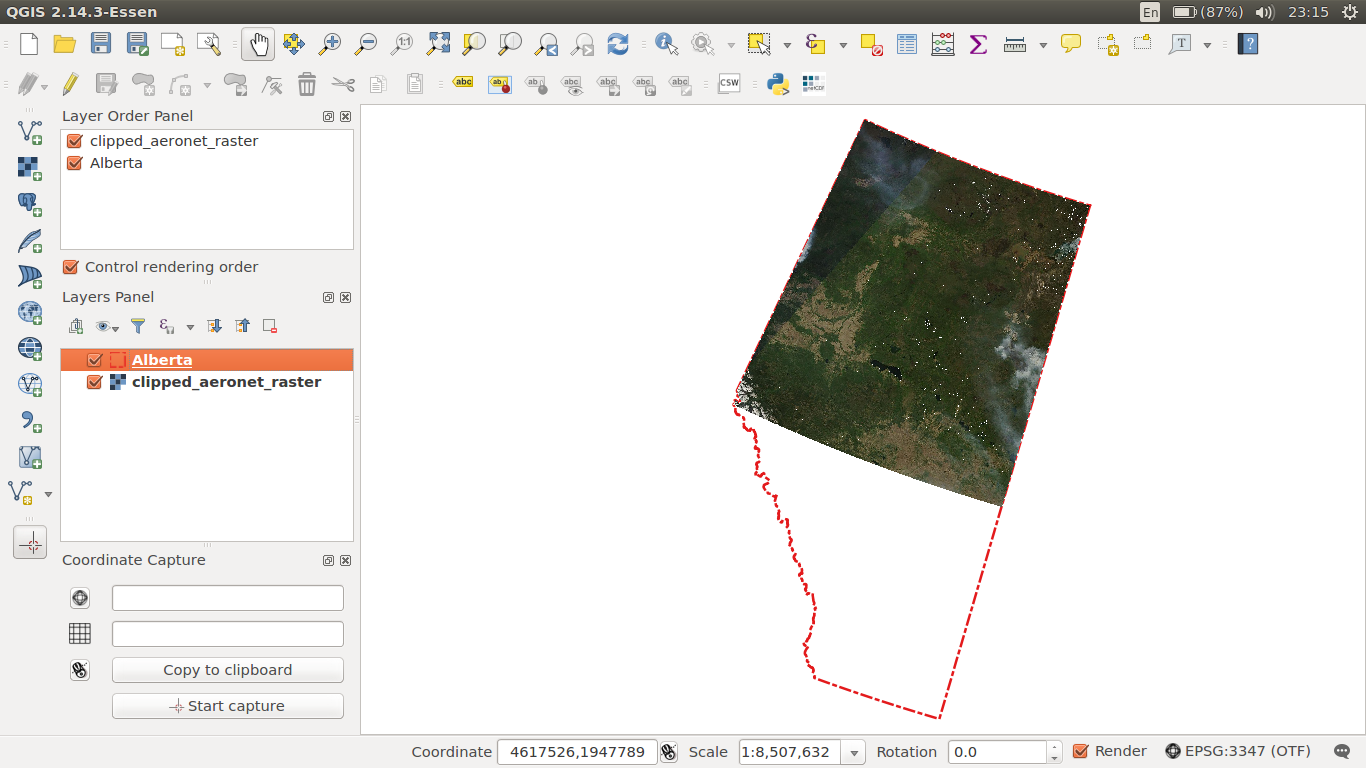

In [27]:
Image(filename='Images/lesson6_3.png', width=600, height=600)



Using GDAL from the comand line is a pretty quick and easy way to manipulate vector and raster files without having to run any other programs. Options include methods like ```gda_translate``` which can re-produce a raster image in a different format, or with various bands adjusted. 

For example, when we deal with .tif files, they are can quite large file sizes. Compressing them to a jpeg format can save some space, as long as you don't mind a reduction in image quality:

```

gdal_translate -of JPEG AERONET_Fort_McMurray.2016136.terra.1km.tif AREONET_Fort_McMurray.2016.terra.1km.jpg


```

The benifit of using this method over a simple image editor is the preservation of GIS metadata. The command creates an associated ``` .jpg.aux.xml``` file which preserves the data QGIS will need to project the image correctly. 

See <a href="http://www.gdal.org/gdal_utilities.html">GDAL Utilities</a> for more info about command line options.

# <a id='Step_3'></a>

## Step 3: Using Osgeo in Python

Since this isn't a geography class, lets get into it with some python:

In [28]:
raster = "Data/AERONET_Fort_McMurray.2016136.terra.1km.tif"
shp = "Data/Alberta/Alberta.shp"

In [29]:
# # ---------------------------------------------------------------------------
# Open and transform the raster file into a numpy array
#
# The array has length 3, which is each band: in this case RGB
# Each band has a length of 720, since there are 720 rows in the pixel count
# Each row has 960 entries, since the image is 960 pixels wide. 
#
# (This is why I have opened the 1km image, rather than the 250m image - less pixels to deal with ;-)) 
#----------------------------------------------------------------------------
#

raster_array = gdalnumeric.LoadFile(raster)

print("Shape of Jpeg file: {}".format(raster_array.shape))

print("\n Band 1 values (Red): \n {}".format(raster_array[0]))
print("\n Band 2 values (Green): \n {}".format(raster_array[1]))
print("\n Band 3 values (Blue): \n {}".format(raster_array[2]))


Shape of Jpeg file: (3, 720, 960)

 Band 1 values (Red): 
 [[ 49  47  41 ...,  29  52  36]
 [ 52  47  40 ...,  52  49  41]
 [ 52  46  40 ...,  49  27  49]
 ..., 
 [ 58  45 153 ...,  97 241 200]
 [195  62  36 ...,  83 114 124]
 [246 190 120 ...,  93  95  48]]

 Band 2 values (Green): 
 [[ 52  50  44 ...,  22  45  29]
 [ 54  49  42 ...,  45  42  34]
 [ 54  48  42 ...,  45  20  42]
 ..., 
 [ 60  47 153 ...,  98 242 199]
 [197  62  36 ...,  84 115 125]
 [248 190 120 ...,  94  96  49]]

 Band 3 values (Blue): 
 [[ 45  43  37 ...,  12  35  19]
 [ 49  44  37 ...,  35  32  24]
 [ 49  43  37 ...,  34  10  32]
 ..., 
 [ 59  46 151 ...,  93 237 197]
 [196  62  34 ...,  79 110 120]
 [247 188 118 ...,  89  91  44]]


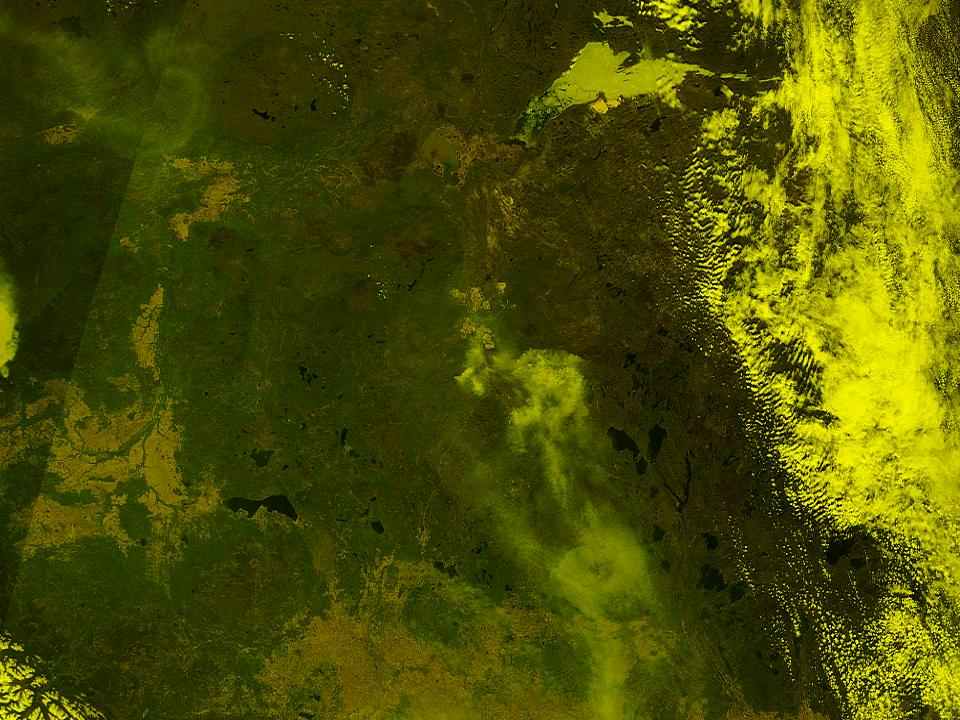

In [30]:
#
# --------------------------------------------------------------------------------------
# To see what happens if you mask a band when you re-write:
#
# (note: you still require 3 bands for jpg format, so we set the blue band to zero values)
# ---------------------------------------------------------------------------------------
#

blue_band = np.zeros_like(raster_array[2])
test_array = np.array([raster_array[0], raster_array[1], blue_band])

gdalnumeric.SaveArray(test_array, "Images/RG_only_image.jpg", format="JPEG")

Image(filename='Images/RG_only_image.jpg', width = 500, height = 500)

# <a id='readings'></a>

## Suggested Readings

# <a id='References'></a>

## References

- Lawhead, J; *"Clip a Raster Using a Shapefile"*, <a href='http://geospatialpython.com/2011/02/clip-raster-using-shapefile.html'>GeospatialPython.com</a>. 2011.

- Clark, A; *"The new fork for the Python Imaging Library"*, <a href="https://pillow.readthedocs.io/en/latest/index.html">Pillow</a>. 2016.

- The Open Source Geospatial Foundation: http://www.osgeo.org/. 2016.

- Herman, J; *"Python â€“ Clip raster data with a shapefile"*, <a href="https://waterprogramming.wordpress.com/2014/10/03/python-clip-raster-data-with-a-shapefile/">Water Programming: A Collaborative Research Blog</a>. 2014.